In [1]:
import pandas as pd
import dicts
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Declaring the names of the columns we're interested in

In [2]:
columnas=['DP','DPNOM','DPMP','MPIO','AÑO','ÁREA GEOGRÁFICA']+[str(5*i)+"_"+str(5*(i+1)) for i in range(20)]+["Mujeres_100"]


# Reading the population by genre an municipalities for the period considered

df_1995_2004=pd.DataFrame(pd.read_excel("anexo-area-sexo-edad-proyecciones-poblacion-Municipal_1995-2004.xlsx"))
df_2004_2017=pd.DataFrame(pd.read_excel("anexo-area-sexo-edad-proyecciones-poblacion-Municipal_2005-2017.xlsx"))
df_2018=pd.DataFrame(pd.read_excel("anexo-proyecciones-poblacion-Municipal_2018-2026.xlsx"))

In [3]:
df_1995_2004=pd.DataFrame(pd.read_csv("anexo-area-sexo-edad-proyecciones-poblacion-Municipal_1995-2004.csv"))
df_2004_2017=pd.DataFrame(pd.read_csv("anexo-area-sexo-edad-proyecciones-poblacion-Municipal_2005-2017.csv"))
df_2018=pd.DataFrame(pd.read_csv("anexo-proyecciones-poblacion-Municipal_2018-2026.csv"))

df_1995_2004.to_csv("anexo-area-sexo-edad-proyecciones-poblacion-Municipal_1995-2004.csv")
df_2004_2017.to_csv("anexo-area-sexo-edad-proyecciones-poblacion-Municipal_2005-2017.csv")
df_2018.to_csv("anexo-proyecciones-poblacion-Municipal_2018-2026.csv")



# Standardizing the names and codes of the municipalities, filtering data associated to the whole municipalities.

In [4]:
df_1995_2004=df_1995_2004[df_1995_2004['ÁREA GEOGRÁFICA']=="Total"].copy()
df_1995_2004.DPMP=df_1995_2004.DPMP.apply(lambda x: str(x).zfill(5))

In [5]:
df_2004_2017=df_2004_2017[df_2004_2017['ÁREA GEOGRÁFICA']=="Total"].copy()
df_2004_2017.DPMP=df_2004_2017.DPMP.apply(lambda x: str(x).zfill(5))

In [6]:
df_2018=df_2018[df_2018['ÁREA GEOGRÁFICA']=="Total"].copy()
df_2018.DPMP=df_2018.DPMP.apply(lambda x: str(x).zfill(5))


# Selecting data associated to woman populations during the time horizon considered

In [7]:
for i in range(20): 
    df_1995_2004[str(5*i)+"_"+str(5*(i+1))]=sum(df_1995_2004["Mujeres_"+str(j)] for j in range(i*5,(i+1)*5))


In [8]:
for i in range(20): 
    df_2004_2017[str(5*i)+"_"+str(5*(i+1))]=sum(df_2004_2017["Mujeres_"+str(j)] for j in range(i*5,(i+1)*5))

In [9]:
for i in range(20): 
    df_2018[str(5*i)+"_"+str(5*(i+1))]=sum(df_2018["Mujeres_"+str(j)] for j in range(i*5,(i+1)*5))

# Selecting the subset of columns we are interested in

In [10]:
df_1995_2004=df_1995_2004[columnas]
df_2004_2017=df_2004_2017[columnas]
df_2018=df_2018[columnas]

# Concatenating dataframes and saving it to an external file for further processing (if necessary)

In [29]:
df=pd.concat([df_1995_2004,df_2004_2017,df_2018])

df["yes"]=df["DPMP"].astype(int).isin(dicts.municipios_segregantes_unique.keys())
df["newcode"]=df["DPMP"].apply(lambda x: dicts.municipios_segregantes_unique[int(x)] if (int(x) in dicts.municipios_segregantes_unique.keys()) else x)
df["DPMP"]=df["newcode"].apply(lambda x: str(int(x)).zfill(5))

display(df[df["yes"]])
df.to_csv("población_por_grupo.csv")
df[df["DPMP"]=="13600"].head(50)


,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,0_5,5_10,10_15,15_20,...,65_70,70_75,75_80,80_85,85_90,90_95,95_100,Mujeres_100,yes,newcode
1720,13,Bolívar,13600,Norosí,1995,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
1721,13,Bolívar,13600,Norosí,1996,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
1722,13,Bolívar,13600,Norosí,1997,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
1723,13,Bolívar,13600,Norosí,1998,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
1724,13,Bolívar,13600,Norosí,1999,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8437,70,Sucre,70820,Coveñas,2022,Total,722,738,745,796,...,198,140,82,47,36,17,12,2,True,70820
8438,70,Sucre,70820,Coveñas,2023,Total,717,740,746,794,...,205,145,86,50,36,18,12,2,True,70820
8439,70,Sucre,70820,Coveñas,2024,Total,690,738,756,805,...,207,143,86,53,29,17,8,4,True,70820
8440,70,Sucre,70820,Coveñas,2025,Total,670,728,760,810,...,215,146,90,54,29,17,8,4,True,70820


,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,0_5,5_10,10_15,15_20,...,65_70,70_75,75_80,80_85,85_90,90_95,95_100,Mujeres_100,yes,newcode
1720,13,Bolívar,13600,Norosí,1995,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
1721,13,Bolívar,13600,Norosí,1996,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
1722,13,Bolívar,13600,Norosí,1997,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
1723,13,Bolívar,13600,Norosí,1998,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
1724,13,Bolívar,13600,Norosí,1999,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
1725,13,Bolívar,13600,Norosí,2000,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
1726,13,Bolívar,13600,Norosí,2001,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
1727,13,Bolívar,13600,Norosí,2002,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
1728,13,Bolívar,13600,Norosí,2003,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600
1729,13,Bolívar,13600,Norosí,2004,Total,0,0,0,0,...,0,0,0,0,0,0,0,0,True,13600


In [30]:
for ids in df[df["yes"]].DPMP.unique():
    for year in range(1995,2019):
        for i in range(20):
            df.loc[(df["DPMP"] == str(ids)) & (df["AÑO"] == year) & (~df["yes"]), str(5*i)+"_"+str(5*(i+1))]=df.loc[(df["DPMP"] == str(ids)) & (df["AÑO"] == year) & (~df["yes"]), str(5*i)+"_"+str(5*(i+1))]+sum(df.loc[(df["DPMP"] == str(ids)) & (df["AÑO"] == year) & (df["yes"]), str(5*i)+"_"+str(5*(i+1))])



In [31]:
df=df[~df['yes']].copy()

In [32]:
del df['yes']
del df["newcode"]

In [33]:
df["Total"]=sum(df[str(5*i)+"_"+str(5*(i+1))] for i in range(20))+df["Mujeres_100"]


In [34]:
df

,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,0_5,5_10,10_15,15_20,...,60_65,65_70,70_75,75_80,80_85,85_90,90_95,95_100,Mujeres_100,Total
0,5,Antioquia,05001,Medellín,1995,Total,87865,85949,84068,80847,...,24672,20169,14980,10543,6477,3342,1573,582,250,941748
1,5,Antioquia,05001,Medellín,1996,Total,88320,87597,84741,83325,...,25075,20797,15622,11147,6839,3495,1602,574,240,959265
2,5,Antioquia,05001,Medellín,1997,Total,88319,88993,85300,85540,...,25539,21392,16316,11728,7158,3705,1621,574,237,974987
3,5,Antioquia,05001,Medellín,1998,Total,88162,90335,86309,87523,...,26166,21949,17021,12315,7430,3924,1649,585,235,991843
4,5,Antioquia,05001,Medellín,1999,Total,87698,91439,87795,89112,...,26943,22456,17727,12577,7974,4099,1670,589,226,1008226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10093,99,Vichada,99773,Cumaribo,2022,Total,5136,5077,5009,4613,...,716,494,345,193,112,50,19,7,7,38063
10094,99,Vichada,99773,Cumaribo,2023,Total,5144,4985,4974,4667,...,748,517,370,207,121,56,18,7,7,38495
10095,99,Vichada,99773,Cumaribo,2024,Total,5021,4885,5024,4783,...,768,539,378,210,104,41,12,3,1,39022
10096,99,Vichada,99773,Cumaribo,2025,Total,5046,4810,4994,4835,...,792,572,393,231,108,43,13,2,1,39590


## Limiting the dataframe to contain information only for the time period being considered in this research

In [35]:
df=df[df["AÑO"].isin([ano for ano in range(1998,2019)])].copy()

## Changing the name of the columns to correspond to those of the Cancer datasets (age group)

In [36]:
df.columns=['DP', 'DPNOM', 'DPMP', 'MPIO', 'AÑO', 'ÁREA GEOGRÁFICA', '0_5', '5_10',
       '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28','Total']

# All information for age groups over 25 are associated (summed up) to the latter.

In [37]:
df["25"]=sum([df["25"],df["26"],df["27"],df["28"]])

# Keeping information for the age groups of interest

In [38]:
df=df[['DP', 'DPNOM', 'DPMP', 'MPIO', 'AÑO', 'ÁREA GEOGRÁFICA', 
       '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25','Total']].copy()

# Exclusión de municipios no considerados para este análisis

excluded=['13490', '17495', '19300', '19785', '19845', '23682', '23815',
       '27150', '27160', '27425', '27430', '27450', '27580', '27600',
       '27810', '44035', '44420', '47030', '47205', '47460', '47660',
       '47720', '47960', '47980', '52254', '52480', '70221', '91263',
       '91405', '91407', '91430', '91460', '91530', '91536', '91669',
       '91798', '94343', '94663', '94883', '94884', '94885', '94886',
       '94887', '94888', '97511', '97777', '97889']
df=df[~df.DPMP.isin(excluded)].copy()

In [39]:
len(df.DPMP.unique())

1104

lista_with_excluded=list(df.DPMP.unique())
print(lista_with_excluded)

# Creating an auxiliar ID that will be later used for joining the population data set to the Cancer data set

In [40]:
df["id"]=df.apply(lambda x: str(x.AÑO)+"-"+str(x.DPMP),axis=1)

In [41]:
df

,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,10,11,12,13,...,18,19,20,21,22,23,24,25,Total,id
3,5,Antioquia,05001,Medellín,1998,Total,86309,87523,82886,85891,...,45277,34023,26166,21949,17021,12315,7430,6393,991843,1998-05001
4,5,Antioquia,05001,Medellín,1999,Total,87795,89112,84462,84151,...,47328,35824,26943,22456,17727,12577,7974,6584,1008226,1999-05001
5,5,Antioquia,05001,Medellín,2000,Total,89643,90256,86793,82865,...,49388,37728,27968,22744,18119,12915,8382,6784,1024009,2000-05001
6,5,Antioquia,05001,Medellín,2001,Total,91471,90985,89390,82136,...,51486,39748,29282,22993,18381,13284,8820,7044,1039108,2001-05001
7,5,Antioquia,05001,Medellín,2002,Total,93120,91592,91773,82112,...,53683,41834,30743,23518,18858,13799,9254,7355,1053805,2002-05001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10053,97,Vaupés,97889,Yavaraté (CD),2018,Total,118,76,23,14,...,7,7,6,3,3,8,11,9,502,2018-97889
10062,99,Vichada,99001,Puerto Carreño,2018,Total,977,950,922,889,...,402,337,275,178,79,47,26,30,9912,2018-99001
10071,99,Vichada,99524,La Primavera,2018,Total,585,483,401,392,...,198,142,108,87,49,27,17,27,4724,2018-99524
10080,99,Vichada,99624,Santa Rosalía,2018,Total,253,200,162,142,...,77,64,53,39,20,13,8,7,1929,2018-99624


# Reading the Cancer data set and Joining Tables

In [42]:
pd.read_csv("Cancer_1998_2018.csv")

,Unnamed: 0,ano,codptore,codmunre,gru_ed1,gru_ed2,area_res
0,0,1998.0,19,19075,14,4,2
1,1,1998.0,27,27001,23,6,1
2,2,1998.0,47,47541,18,5,2
3,3,1998.0,50,50001,22,6,1
4,4,1998.0,54,54099,22,6,3
...,...,...,...,...,...,...,...
46747,46747,2018.0,8,8001,14,4,1
46748,46748,2018.0,11,11001,23,6,1
46749,46749,2018.0,76,76275,20,5,1
46750,46750,2018.0,8,8001,19,5,1


In [43]:
df_mort=pd.read_csv("Cancer_1998_2018.csv")
df_mort["codmunicipio"]=df_mort.apply(lambda x: str(x.codmunre.astype(int)).zfill(5),axis=1)
df_mort=df_mort.astype({'ano': 'int32',"area_res":'float32'})
df_mort=pd.DataFrame(pd.pivot_table(df_mort,values='gru_ed2',index=["codmunicipio",'ano'], columns=["gru_ed1"], aggfunc="count").fillna(0).reset_index())
df_mort

gru_ed1,codmunicipio,ano,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,05001,1998,0.0,0.0,0.0,0.0,4.0,3.0,6.0,12.0,17.0,8.0,17.0,14.0,11.0,13.0,6.0,4.0,2.0
1,05001,1999,0.0,0.0,0.0,0.0,2.0,7.0,10.0,21.0,14.0,23.0,8.0,14.0,14.0,12.0,9.0,6.0,0.0
2,05001,2000,0.0,0.0,0.0,0.0,2.0,5.0,20.0,20.0,20.0,22.0,16.0,8.0,10.0,8.0,11.0,10.0,0.0
3,05001,2001,0.0,0.0,0.0,0.0,3.0,7.0,11.0,16.0,12.0,19.0,7.0,12.0,8.0,14.0,5.0,6.0,1.0
4,05001,2002,0.0,0.0,0.0,2.0,5.0,7.0,8.0,15.0,15.0,17.0,21.0,11.0,18.0,13.0,12.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,99524,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8080,99624,2011,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8081,99773,2009,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8082,99773,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_mort["mort"]=sum(df_mort[i] for i in range(10,27))

In [45]:
df_mort

gru_ed1,codmunicipio,ano,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,mort
0,05001,1998,0.0,0.0,0.0,0.0,4.0,3.0,6.0,12.0,17.0,8.0,17.0,14.0,11.0,13.0,6.0,4.0,2.0,117.0
1,05001,1999,0.0,0.0,0.0,0.0,2.0,7.0,10.0,21.0,14.0,23.0,8.0,14.0,14.0,12.0,9.0,6.0,0.0,140.0
2,05001,2000,0.0,0.0,0.0,0.0,2.0,5.0,20.0,20.0,20.0,22.0,16.0,8.0,10.0,8.0,11.0,10.0,0.0,152.0
3,05001,2001,0.0,0.0,0.0,0.0,3.0,7.0,11.0,16.0,12.0,19.0,7.0,12.0,8.0,14.0,5.0,6.0,1.0,121.0
4,05001,2002,0.0,0.0,0.0,2.0,5.0,7.0,8.0,15.0,15.0,17.0,21.0,11.0,18.0,13.0,12.0,12.0,0.0,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,99524,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8080,99624,2011,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8081,99773,2009,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8082,99773,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


df_mort=df_mort[~df_mort.codmunicipio.isin(excluded)].copy()

# Creating an auxiliar ID to join DataFrames

In [46]:
df_mort["id"]=df_mort.apply(lambda x: str(x.ano)+"-"+str(x.codmunicipio),axis=1)

In [61]:
df_both=df.merge(df_mort,how="inner",on="id").fillna(0)
df_both

,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,10,11,12,13,...,18,19,20,21,22,23,24,25,26,mort
0,5,Antioquia,05001,Medellín,1998,Total,86309,87523,82886,85891,...,17.0,8.0,17.0,14.0,11.0,13.0,6.0,4.0,2.0,117.0
1,5,Antioquia,05001,Medellín,1999,Total,87795,89112,84462,84151,...,14.0,23.0,8.0,14.0,14.0,12.0,9.0,6.0,0.0,140.0
2,5,Antioquia,05001,Medellín,2000,Total,89643,90256,86793,82865,...,20.0,22.0,16.0,8.0,10.0,8.0,11.0,10.0,0.0,152.0
3,5,Antioquia,05001,Medellín,2001,Total,91471,90985,89390,82136,...,12.0,19.0,7.0,12.0,8.0,14.0,5.0,6.0,1.0,121.0
4,5,Antioquia,05001,Medellín,2002,Total,93120,91592,91773,82112,...,15.0,17.0,21.0,11.0,18.0,13.0,12.0,12.0,0.0,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,88,Archipiélago de San Andrés,88001,San Andrés,2018,Total,1955,2000,2073,2421,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
8080,91,Amazonas,91001,Leticia,2018,Total,2606,2191,1915,1934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8081,94,Guainía,94001,Inírida,2018,Total,1847,1696,1410,1158,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8082,95,Guaviare,95001,San José del Guaviare,2018,Total,2634,2488,2278,1966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Computing the mortality rates for each group

In [62]:
for i in range(10,26):
    df_both["tasa_"+str(i)]=df_both[i]/df_both[str(i)]*100000

In [63]:
df_both.sort_values(by=["DPMP","AÑO"]).head(21)

,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,10,11,12,13,...,tasa_16,tasa_17,tasa_18,tasa_19,tasa_20,tasa_21,tasa_22,tasa_23,tasa_24,tasa_25
0,5,Antioquia,05001,Medellín,1998,Total,86309,87523,82886,85891,...,8.643167,21.319310,37.546657,23.513506,64.969808,63.784227,64.626050,105.562322,80.753701,62.568434
1,5,Antioquia,05001,Medellín,1999,Total,87795,89112,84462,84151,...,13.898347,35.854533,29.580798,64.202769,29.692313,62.344140,78.975574,95.412260,112.866817,91.130012
2,5,Antioquia,05001,Medellín,2000,Total,89643,90256,86793,82865,...,26.862584,32.833714,40.495667,58.312129,57.208238,35.174112,55.190684,61.943477,131.233596,147.405660
3,5,Antioquia,05001,Medellín,2001,Total,91471,90985,89390,82136,...,14.305221,25.237787,23.307307,47.801147,23.905471,52.189797,43.523203,105.389943,56.689342,85.178876
4,5,Antioquia,05001,Medellín,2002,Total,93120,91592,91773,82112,...,10.101265,22.740710,27.941807,40.636803,68.308233,46.772685,95.450207,94.209725,129.673655,163.154317
5,5,Antioquia,05001,Medellín,2003,Total,94451,92407,93721,82940,...,15.971497,30.614030,33.943118,61.450225,74.147306,66.145769,82.811449,118.665364,61.804697,143.005720
6,5,Antioquia,05001,Medellín,2004,Total,95450,93538,95159,84606,...,11.986240,23.868024,37.667363,52.127452,70.296711,52.022890,50.776886,54.233611,111.663790,155.242417
2284,5,Antioquia,05001,Medellín,2005,Total,92223,93032,95957,87566,...,6.935775,18.521949,18.970233,37.631214,37.057625,80.698408,76.602672,38.336209,96.404126,144.188110
2285,5,Antioquia,05001,Medellín,2006,Total,92454,94632,96542,90310,...,15.921575,20.466639,31.822521,45.484696,55.137845,55.994960,98.568411,112.528132,65.292417,136.168430
2286,5,Antioquia,05001,Medellín,2007,Total,92327,96208,97122,92865,...,12.396042,19.836842,26.171540,34.468996,49.926299,59.870281,73.290275,103.981895,90.057637,139.220366


In [64]:
df_both.columns

Index([             'DP',           'DPNOM',            'DPMP',
                  'MPIO',             'AÑO', 'ÁREA GEOGRÁFICA',
                    '10',              '11',              '12',
                    '13',              '14',              '15',
                    '16',              '17',              '18',
                    '19',              '20',              '21',
                    '22',              '23',              '24',
                    '25',           'Total',              'id',
          'codmunicipio',             'ano',                10,
                      11,                12,                13,
                      14,                15,                16,
                      17,                18,                19,
                      20,                21,                22,
                      23,                24,                25,
                      26,            'mort',         'tasa_10',
               'tasa_11',         'tasa_

In [65]:
df_both.to_csv("TasasAjustadas.csv")

## Creating a dictionary based on the weights corresponding to each age group according to the WHO (2000 - 2025) Note: Does not sum 100 because it was not necessary to keep the age groups below 10, provided there were no information about breast cancer in the studied period

In [66]:
df_both=pd.read_csv("TasasAjustadas.csv")

In [67]:
diccionario={10: 8.60,
11: 8.47,
12: 8.22,
13: 7.93,
14: 7.61,
15: 7.15,
16: 6.59,
17 :6.04,
18 :5.37,
19 :4.55,
20 :3.72,
21 :2.96,
22 :2.21,
23 :1.52,
24 :0.91,
25 :0.44+0.15+0.04+0.005}

### Adjusting mortality rate by age (direct method)

In [68]:
df_both["TEA"]=sum(df_both["tasa_"+str(i)]*diccionario[i]/100 for i in range(10,25))


In [69]:
df_both.columns

Index(['Unnamed: 0', 'DP', 'DPNOM', 'DPMP', 'MPIO', 'AÑO', 'ÁREA GEOGRÁFICA',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', 'Total', 'id', 'codmunicipio', 'ano', '10.1',
       '11.1', '12.1', '13.1', '14.1', '15.1', '16.1', '17.1', '18.1', '19.1',
       '20.1', '21.1', '22.1', '23.1', '24.1', '25.1', '26', 'mort', 'tasa_10',
       'tasa_11', 'tasa_12', 'tasa_13', 'tasa_14', 'tasa_15', 'tasa_16',
       'tasa_17', 'tasa_18', 'tasa_19', 'tasa_20', 'tasa_21', 'tasa_22',
       'tasa_23', 'tasa_24', 'tasa_25', 'TEA'],
      dtype='object')

df_out=df_both[df_both["AÑO"]==2018][["DPMP","TEA"]].copy()
df_out.DPMP=df_out.DPMP.apply(lambda x: str(x).zfill(5) )
df_out.to_csv("TEA_2018.csv")
df_out


# Computando la tasa ajustada de mortalidad por quinquenio

Agregando una variable llamada periodo de acuerdo al año evaluado.

In [70]:
df_both["periodo"]=pd.cut(df_both.AÑO, bins=[0, 2002, 2007, 2012, 100000], labels='1998-2002 2003-2007 2008-2012 2013-2018'.split())
df_both=df_both[['DP', 'DPNOM', 'DPMP', 'MPIO', 'AÑO', 'ÁREA GEOGRÁFICA','periodo','TEA',"mort"]].copy()
df_both.DPMP=df_both.DPMP.apply(lambda x: str(int(x)).zfill(5))

df_out# Se genera un nuevo dataframe que asocia municipios, años y tasas de mortalidad para posteriormente unirlo con las variables socioeconómicas.

In [71]:
df_both

,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,periodo,TEA,mort
0,5,Antioquia,05001,Medellín,1998,Total,1998-2002,13.607379,117.0
1,5,Antioquia,05001,Medellín,1999,Total,1998-2002,15.519162,140.0
2,5,Antioquia,05001,Medellín,2000,Total,1998-2002,15.687747,152.0
3,5,Antioquia,05001,Medellín,2001,Total,1998-2002,12.235044,121.0
4,5,Antioquia,05001,Medellín,2002,Total,1998-2002,15.235940,156.0
...,...,...,...,...,...,...,...,...,...
8079,88,Archipiélago de San Andrés,88001,San Andrés,2018,Total,2013-2018,8.333206,3.0
8080,91,Amazonas,91001,Leticia,2018,Total,2013-2018,4.595116,1.0
8081,94,Guainía,94001,Inírida,2018,Total,2013-2018,9.658273,1.0
8082,95,Guaviare,95001,San José del Guaviare,2018,Total,2013-2018,4.140127,1.0


In [79]:
df_out=pd.DataFrame(df.DPMP.unique())
df_out.columns=["DPMP"]

for y in list(df_both["AÑO"].unique()):
    df_out["TAE_"+str(y)]=df_out.DPMP.map(df_both[df_both["AÑO"]==y].set_index("DPMP")["TEA"])

for y in list(df_both["AÑO"].unique()):
    df_out["mort_"+str(y)]=df_out.DPMP.map(df_both[df_both["AÑO"]==y].set_index("DPMP")["mort"])    

df_out.DPMP=df_out.DPMP.apply(lambda x: str(int(x)).zfill(5))
df_out=df_out.fillna(0)

In [80]:
dictio=pd.DataFrame(pd.read_csv("DIVIPOLA_Municipios.csv"))
dictio.COD=dictio.COD.astype(str)
dictio.COD=dictio.COD.apply(lambda x: x.zfill(5))
print(dictio.columns)
dictio=dictio.set_index('COD').T.to_dict()
for i in dictio.keys():
    dictio[i]=dictio[i]['MUNICIPIO']

df_out["MPIO"]=df_out.DPMP.map(dictio).apply(lambda x: str(x).capitalize())

Index(['COD', 'MUNICIPIO'], dtype='object')


In [81]:
df_hernan=pd.DataFrame(pd.read_csv("BD_MUNICIPIOS_RED_VAR.csv"))
df_hernan=df_hernan.dropna().copy()
df_hernan=df_hernan.fillna(-1)
df_hernan.DPMP=df_hernan.DPMP.astype(int).apply(lambda x: str(int(x)).zfill(5))
df_out=df_out.fillna(0).merge(df_hernan,how="left", on="DPMP")

df_out.to_excel("TAE_&_Hernan.xlsx")

final=set(df_out.dropna().DPMP.unique())
set_extra=set(lista_with_excluded).difference(final)
set_extra

df_out[df_out.DPMP.isin(set_extra)][["DPMP","MPIO"]]

print(list(colombia[colombia.MPIOS.isin(set_extra)].NOMBRE_CAB))

In [48]:
import geopandas as gpd
colombia=gpd.read_file("mpio/mpio.shp")
colombia

,AREA,PERIMETER,WCOLGEN02_,WCOLGEN021,DPTO,NOMBRE_DPT,MPIO,NOMBRE_MPI,NOMBRE_CAB,CLASEMUN,MPIOS,ZONA,OF_REG,REG_ZONAS,HECTARES,geometry
0,7.516766e+09,475636.130236,2,566,44,LA GUAJIRA,847,URIBIA,URIBIA,CM,44847,ZONA06,DABAR,DABARZONA06,751676.579,"POLYGON ((1290154.980 1796649.425, 1270385.550..."
1,1.624663e+09,195961.387498,5,564,44,LA GUAJIRA,560,MANAURE,MANAURE,CM,44560,ZONA06,DABAR,DABARZONA06,162466.283,"POLYGON ((1187687.339 1800431.820, 1188158.788..."
2,1.779934e+09,272174.538806,6,563,44,LA GUAJIRA,430,MAICAO,MAICAO,CM,44430,ZONA06,DABAR,DABARZONA06,177993.385,"POLYGON ((1198031.055 1767210.476, 1212713.613..."
3,3.109950e+09,267346.564817,7,559,44,LA GUAJIRA,001,RIOHACHA,RIOHACHA,CM,44001,ZONA06,DABAR,DABARZONA06,310995.043,"POLYGON ((1156062.702 1755981.216, 1159630.667..."
4,1.999866e+09,198794.872346,8,1052,44,LA GUAJIRA,090,DIBULLA,DIBULLA,CM,44090,ZONA06,DABAR,DABARZONA06,199986.641,"POLYGON ((1095571.713 1750924.096, 1097255.333..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1.333941e+09,211788.556842,1122,361,05,ANTIOQUIA,480,MUTATA,MUTATA,CM,05480,ZONA02,DAMED,DAMEDZONA02,133394.129,"POLYGON ((704986.838 1318357.371, 716584.555 1..."
1118,2.816016e+09,359760.445480,1123,287,27,CHOCO,150,CARMEN DEL DARIEN,CARMEN DEL DARIEN,CM,27150,ZONA02,DAMED,DAMEDZONA02,281601.625,"POLYGON ((689343.717 1293927.217, 689505.362 1..."
1119,2.727328e+07,40602.945357,4,994,88,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,001,SAN ANDRES,SAN ANDRES,CM,88001,ZONA08,DABAR,DABARZONA08,2727.328,"POLYGON ((168440.793 1896450.410, 168454.340 1..."
1120,1.293062e+06,5955.813895,1098,995,88,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,564,SANTA CATALINA,SANTA CATALINA,CM,88000,ZONA08,DABAR,DABARZONA08,129.306,"POLYGON ((208230.889 1983876.766, 208230.084 1..."


In [49]:
df_both.groupby(["periodo"]).agg(["mean","std"])["TEA"]

,mean,std
periodo,,
1998-2002,5.466461,13.584949
2003-2007,5.751610,11.776613
2008-2012,6.253839,12.351512
2013-2018,6.785966,11.908783


In [50]:
df_both.columns

Index(['DP', 'DPNOM', 'DPMP', 'MPIO', 'AÑO', 'ÁREA GEOGRÁFICA', 'periodo',
       'TEA'],
      dtype='object')

In [51]:
out=df_both.groupby(["DPMP","periodo"]).agg("mean")[["TEA"]].reset_index()
#out.set_index("DPMP").T.to_dict()


In [52]:
out

,DPMP,periodo,TEA
0,05001,1998-2002,14.457054
1,05001,2003-2007,14.429498
2,05001,2008-2012,14.321613
3,05001,2013-2018,14.687949
4,05002,1998-2002,0.000000
...,...,...,...
4483,99624,2013-2018,0.000000
4484,99773,1998-2002,0.000000
4485,99773,2003-2007,0.000000
4486,99773,2008-2012,1.192661


array([[<AxesSubplot:title={'center':'TEA'}>]], dtype=object)

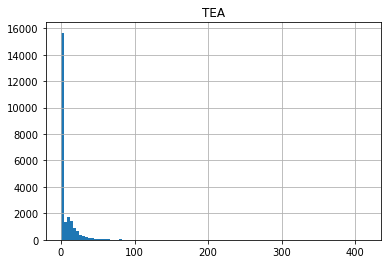

In [53]:
df_both.hist(column="TEA",bins=100)

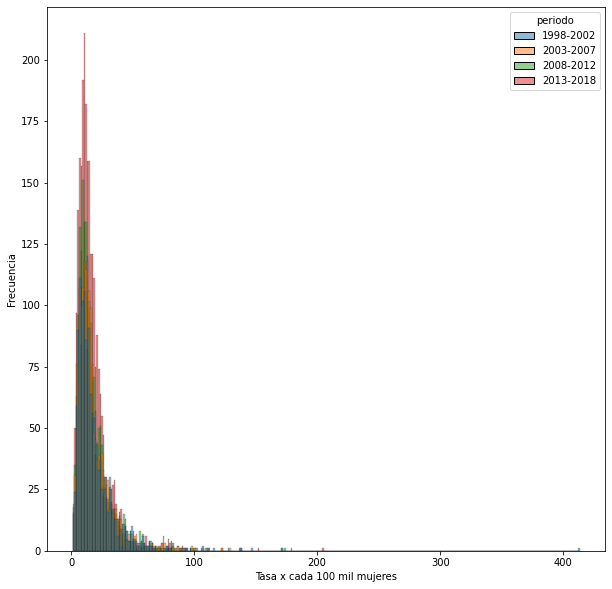

In [54]:
fig,ax=plt.subplots(figsize=(10,10))
sns.histplot(data=df_both[df_both.TEA>0],x="TEA",hue="periodo")
ax.set(xlabel='Tasa x cada 100 mil mujeres', ylabel='Frecuencia')
plt.show()

In [55]:
delta_tasa=df_both[(df_both["AÑO"].isin([1998,2018]))].pivot(index=['DPMP','MPIO'],columns='periodo')[['TEA']]
delta_tasa["delta"]=(delta_tasa["TEA"]["2013-2018"]-delta_tasa["TEA"]["1998-2002"])
delta_tasa=delta_tasa.sort_values(by="delta",ascending=False).reset_index()
delta_tasa

DPMP               MPIO       TEA                 delta
periodo                           1998-2002  2013-2018           
0        68169             Charta       0.0  79.397590  79.397590
1        15537         Paz de Río       0.0  71.527548  71.527548
2        54553   Puerto Santander       0.0  66.095571  66.095571
3        15500             Oicatá       0.0  61.486486  61.486486
4        13160         Cantagallo       0.0  58.461538  58.461538
...        ...                ...       ...        ...        ...
1117     94885  La Guadalupe (CD)       NaN        NaN        NaN
1118     94886      Cacahual (CD)       NaN   0.000000        NaN
1119     94887     Pana Pana (CD)       NaN   0.000000        NaN
1120     94888      Morichal (CD)       NaN   0.000000        NaN
1121     97161             Carurú       NaN   0.000000        NaN

[1122 rows x 5 columns]

<AxesSubplot:xlabel='periodo', ylabel='TEA'>

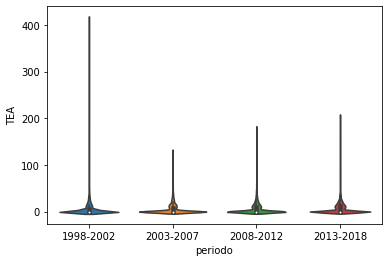

In [56]:
sns.violinplot(data=df_both,x="periodo",y="TEA")

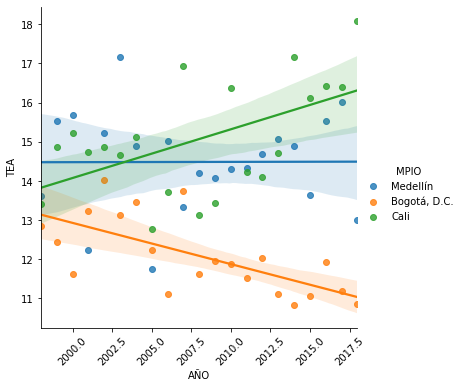

In [57]:
sns.lmplot(data=df_both[df_both.DPMP.isin(["05001","76001","11001"])],x="AÑO",y="TEA",hue="MPIO")
plt.xticks(rotation=45)
plt.show()

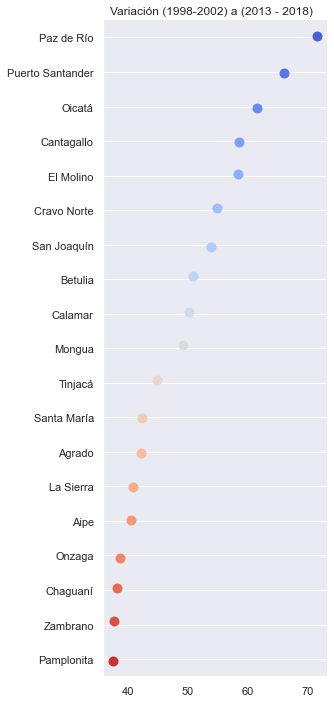

In [58]:

#delta_tasa.MPIO=delta_tasa.MPIO.apply(lambda x: str(x).capitalize())
sns.set(style="darkgrid")

#fg, ax = plt.subplots(figsize = (11,9))

g = sns.PairGrid(delta_tasa.sort_values(by="delta",ascending=False)[1:20], x_vars = 'delta', y_vars = 'MPIO', height = 10, aspect = .4)

g.map(sns.stripplot, size = 10, orient = 'h', palette = 'coolwarm', edgecolor = 'w')

g.set(xlabel='', ylabel='')

titles = ['Variación (1998-2002) a (2013 - 2018)  ']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

In [59]:
df_total=pd.read_csv("TasasAjustadas.csv")
df_total

,Unnamed: 0,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,10,11,12,...,tasa_16,tasa_17,tasa_18,tasa_19,tasa_20,tasa_21,tasa_22,tasa_23,tasa_24,tasa_25
0,0,5,Antioquia,5001,Medellín,1998,Total,86309,87523,82886,...,8.643167,21.319310,37.546657,23.513506,64.969808,63.784227,64.626050,105.562322,80.753701,62.568434
1,1,5,Antioquia,5001,Medellín,1999,Total,87795,89112,84462,...,13.898347,35.854533,29.580798,64.202769,29.692313,62.344140,78.975574,95.412260,112.866817,91.130012
2,2,5,Antioquia,5001,Medellín,2000,Total,89643,90256,86793,...,26.862584,32.833714,40.495667,58.312129,57.208238,35.174112,55.190684,61.943477,131.233596,147.405660
3,3,5,Antioquia,5001,Medellín,2001,Total,91471,90985,89390,...,14.305221,25.237787,23.307307,47.801147,23.905471,52.189797,43.523203,105.389943,56.689342,85.178876
4,4,5,Antioquia,5001,Medellín,2002,Total,93120,91592,91773,...,10.101265,22.740710,27.941807,40.636803,68.308233,46.772685,95.450207,94.209725,129.673655,163.154317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23557,23557,97,Vaupés,97889,Yavaraté (CD),2018,Total,118,76,23,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23558,23558,99,Vichada,99001,Puerto Carreño,2018,Total,977,950,922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23559,23559,99,Vichada,99524,La Primavera,2018,Total,585,483,401,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23560,23560,99,Vichada,99624,Santa Rosalía,2018,Total,253,200,162,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='AÑO', ylabel='TEA'>

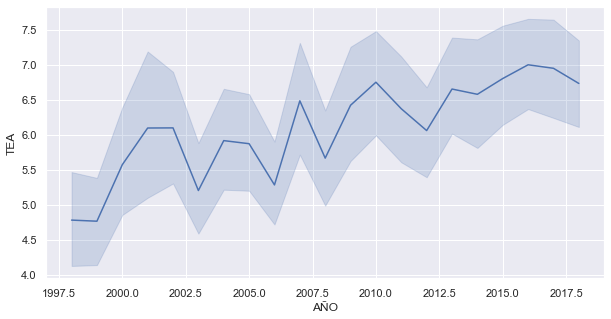

In [60]:
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(data=df_both,x="AÑO",y="TEA",ax=ax)

In [61]:
df_both[["DPMP","periodo","TEA"]].to_csv("join_with_map.csv")
df_both[["DPMP","periodo","TEA"]].DPMP.value_counts()

05001    21
52385    21
52427    21
52418    21
52411    21
         ..
19450    21
19455    21
19473    21
19513    21
99773    21
Name: DPMP, Length: 1122, dtype: int64

In [62]:
df_both[["DPMP","periodo","TEA"]]

,DPMP,periodo,TEA
0,05001,1998-2002,13.607379
1,05001,1998-2002,15.519162
2,05001,1998-2002,15.687747
3,05001,1998-2002,12.235044
4,05001,1998-2002,15.235940
...,...,...,...
23557,97889,2013-2018,0.000000
23558,99001,2013-2018,0.000000
23559,99524,2013-2018,0.000000
23560,99624,2013-2018,0.000000
